In [24]:
TIMES = 1

# **Install and Import Packages**

In [3]:
# !pip install keras
# !pip install multidict
# !pip install nltk
# !pip install deep_translator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler

!pip install pycm
from pycm import *
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
import sklearn

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Added imports for data cleaning
import re 
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer #NEW IMPORT
from nltk.tokenize.treebank import TreebankWordDetokenizer # NEW IMPORT



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.7 MB/s 
     |████████████████████████████████| 595 kB 7.1 MB/s 


In [4]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# **Open FIle**

In [5]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [7]:
# df=pd.read_csv('/content/gdrive/Shareddrives/Thesis Group 2/Thesis II/test/FINAL algorithm/FINAL dataset with tag.csv')
df=pd.read_csv('/content/gdrive/Shareddrives/Thesis Group 2/Thesis II/Post-Defense Requirements/System Files/FINAL dataset with tag.csv')
print("Shape of data=>",df.shape)

Shape of data=> (9999, 4)


In [8]:
df.head()

,tweet,sentiment,language,tag
0,Wag tayo maniwala dyan. Delawan yang Blomberg ...,0,tl,Balita
1,Kaya magpabakuna na po tayong lahat. Para rin ...,0,tl,Regulasyon
2,Labels are good but they can also be problemat...,0,tl,Regulasyon
3,Narito na bagong roleta ng Pilipinas para sa C...,-1,tl,Balita
4,What is political is personal. What is persona...,-1,en,Balita


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9999 non-null   object
 1   sentiment  9999 non-null   int64 
 2   language   9999 non-null   object
 3   tag        9999 non-null   object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [10]:
df.tag.value_counts()

Response      2502
Quarantine    2192
Lockdown      2072
Balita        1398
Regulasyon    1370
Lakbay         465
Name: tag, dtype: int64

# **Cleaning of Tweets**

In [11]:
df.sentiment.value_counts()

-1    3602
 0    3385
 1    3012
Name: sentiment, dtype: int64

In [12]:
#Function to count the vocabulary of the dataset
def create_vocabulary(data):
    vocab = []
    for captions in data.values:
        vocab.extend(captions.split())
    print("Vocabulary Size : {}".format(len(set(vocab))))
    return vocab

In [13]:
#Check if there are NULL values.
df["tweet"].isnull().sum()

0

In [14]:
#print ('Unique Length: ' + str(len(df['Lemma'].unique())))
print ('Unique Length: ' + str(df['tweet'].unique().shape[0]))

Unique Length: 8644


In [15]:
def removeURLs(message) :

    urls = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', message)

    dictOfurls = { i : 5 for i in urls }
    dictOfurls = dict(map(lambda x: (x[0],''), dictOfurls.items() ))

    for k, v in dictOfurls.items():
        message = message.replace(k, v)

    return message

def removeURLs2(message) :

    urls = re.findall('www.(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', message)

    dictOfurls = { i : 5 for i in urls }
    dictOfurls = dict(map(lambda x: (x[0],''), dictOfurls.items() ))

    for k, v in dictOfurls.items():
        message = message.replace(k, v)

    return message

def removeURLs3(message) :

    urls = re.findall('/t.co/(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', message)

    dictOfurls = { i : 5 for i in urls }
    dictOfurls = dict(map(lambda x: (x[0],''), dictOfurls.items() ))

    for k, v in dictOfurls.items():
        message = message.replace(k, v)

    return message

def remove_single_character(text):
    text_len_more_than1 = ""
    for word in text.split():
        if len(word) >= 2:
            text_len_more_than1 += " " + word
    return text_len_more_than1

def remove_hashtag(text):
    no_hashtag = ""
    for word in text.split():
        if '#' not in word:
            no_hashtag += " " + word
        else:
            no_hashtag += word.replace('#', " ")
    return no_hashtag

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [16]:
#Expanding Contractions
contractions_dict = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
      def replace(match):
        return contractions_dict[match.group(0)]
      return contractions_re.sub(replace, text)

In [17]:
df['Cleaned_Tweets']=df['tweet'].apply(removeURLs)
df['Cleaned_Tweets']=df['Cleaned_Tweets'].apply(removeURLs)
df['Cleaned_Tweets']=df['Cleaned_Tweets'].apply(removeURLs)
df['Cleaned_Tweets']=df['Cleaned_Tweets'].apply(removeURLs2)
df['Cleaned_Tweets']=df['Cleaned_Tweets'].apply(removeURLs3)
df['Cleaned_Tweets']=df['Cleaned_Tweets'].apply(lambda x:expand_contractions(x)) # Expanding Contractions in the reviews
df['Cleaned_Tweets']=df['Cleaned_Tweets'].apply(lambda x: re.sub("@[A-Za-z0-9_]+","",x))#remove usernames
#df['Cleaned_Tweets']=df['Cleaned_Tweets'].apply(lambda x: re.sub("#[A-Za-z0-9_]+","",x))#remove hashtags
df['Cleaned_Tweets']=df['Cleaned_Tweets'].apply(remove_emoji)
#df['Cleaned_Tweets']=df['Cleaned_Tweets'].apply(remove_single_character)
df['Cleaned_Tweets']=df['Cleaned_Tweets'].apply(remove_hashtag)
df['Cleaned_Tweets']=df['Cleaned_Tweets'].apply(lambda x: re.sub(r'[^\x00-\x7F]+',' ',x)) # Added remove Unicode/non-ASCII chars
df['Cleaned_Tweets']=df['Cleaned_Tweets'].apply(lambda x: x.lower()) # lowercase all words
df['Cleaned_Tweets']=df['Cleaned_Tweets'].apply(lambda x: re.sub('\w*\d\w*','', x)) # remove all digits and words with digits
df['Cleaned_Tweets']=df['Cleaned_Tweets'].apply(lambda x: re.sub('&amp','', x)) #remove ampersand
df['Cleaned_Tweets']=df['Cleaned_Tweets'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x)) #remove all punctuation
df['Cleaned_Tweets']=df['Cleaned_Tweets'].apply(lambda x: x.strip()) # remove excess spaces


Tokenize Words

In [18]:
#Tokenize words
df['Tokenized_Tweets']=df['Cleaned_Tweets'].apply(lambda x: word_tokenize(x))

Stop Words

In [19]:
# Load default stop words and add a few more specific to my text.
stopwordsList=[]
stpwrds = []
stpwrds = stopwords.words('english')
extndList = ['have not', 'might not', 'not', 'does not', 'need not', 'would not',
             'were not', 'did not', 'had not', 'was not', 'do not', 'is not', 'no',
             'shall not','are not','could not','must not', 'is', 'are',
             'could', 'might', 'must', 'need', 'shall', 'would', 'am', 'have',
             'would', 'ako', 'sa', 'akin', 'ko', 'aking', 'sarili', 'kami', 'atin'
             'ang', 'aming', 'amin', 'ating', 'ka', 'iyong', 'iyo', 'inyong', 'siya',
             'kanya', 'mismo', 'ito', 'nito', 'kanyang', 'sila', 'nila', 'kanila',
             'kanilang', 'kung', 'ano', 'alin', 'sino', 'kanino', 'na', 'mga', 'iyon',
             'am', 'ay', 'maging', 'naging', 'mayroon', 'may', 'nagkaroon', 'pagkakaroon',
             'gumawa', 'ginagawa', 'ginawa', 'paggawa', 'ibig', 'dapat', 'maaari', 'marapat',
             'kong', 'ikaw', 'tayo', 'hindi', 'namin', 'gusto', 'nais', 'niyang', 'nilang', 'niya',
             'huwag', 'ginawang', 'gagawin', 'maaaring', 'sabihin', 'narito', 'kapag', 'ni', 'nasaan',
             'bakit', 'paano', 'kailangan', 'walang', 'katiyakan', 'isang', 'at', 'pero',
             'o', 'dahil', 'bilang', 'hanggang', 'habang', 'ng', 'pamamagitan', 'para',
             'tungkol', 'laban', 'pagitan', 'panahon', 'bago', 'pagkatapos', 'itaas',
             'ibaba', 'mula', 'pataas', 'pababa', 'palabas', 'ibabaw', 'ilalim', 'muli',
             'pa', 'minsan', 'dito', 'doon', 'saan', 'lahat', 'anumang', 'kapwa', 'bawat',
             'ilan', 'karamihan', 'iba', 'tulad', 'lamang', 'pareho', 'kaya', 'kaysa', 'masyado',
             'napaka', 'isa', 'bababa', 'kulang', 'marami', 'ngayon', 'kailanman', 'sabi', 'nabanggit', 
             'din', 'kumuha', 'pumunta', 'pumupunta', 'ilagay', 'makita', 'nakita', 'katulad', 'mahusay',
             'likod', 'kahit', 'paraan', 'noon', 'gayunman', 'dalawa', 'tatlo', 'apat', 'lima',
             'una', 'pangalawa', 'lang', 'ang', 'yung', 'po', 'ag', 'si', 'di', 'rin', 'din', 'nanaman', 'NaN', 'nan', 'na']
rmvList = ['a', 'd','o','m','t','y']
stpwrds.extend(extndList)
#add = stpw.values.flatten()
#stpwrds.extend(add)
#stpwrds.remove(rmvList)
#stpwrds

In [20]:
# Removal of Stop Words
df['Tokenized_Tweets'] = df['Tokenized_Tweets'].apply(lambda x: [item for item in x if item not in stpwrds])

##Lemma

In [25]:
wordnet_lemmatizer = WordNetLemmatizer()
df['Lemma'] = df['Tokenized_Tweets'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x])

In [26]:
def add_tag_to_lemma(row, times=1):
  for k in range(times): 
    row['Lemma'].append( row['tag'])
  return row['Lemma']

In [27]:
df['Lemma'] =  df.apply(lambda x : add_tag_to_lemma(x, TIMES), axis=1)

In [28]:
df['Lemma'][2]

['label',
 'good',
 'also',
 'problematic',
 'baka',
 'ma',
 'mapala',
 'palitan',
 'decisionmakers',
 'kesa',
 'labela',
 'diba',
 'ecq',
 'bbq',
 'itscomplicated',
 'Regulasyon']

In [29]:
cleaned_Tweets = df[['tweet', 'sentiment', 'Cleaned_Tweets', 'Tokenized_Tweets', 'Lemma']]
cleaned_Tweets.head()

,tweet,sentiment,Cleaned_Tweets,Tokenized_Tweets,Lemma
0,Wag tayo maniwala dyan. Delawan yang Blomberg ...,0,wag tayo maniwala dyan delawan yang blomberg ...,"[wag, maniwala, dyan, delawan, yang, blomberg,...","[wag, maniwala, dyan, delawan, yang, blomberg,..."
1,Kaya magpabakuna na po tayong lahat. Para rin ...,0,kaya magpabakuna na po tayong lahat para rin i...,"[magpabakuna, tayong, wehealasoneph]","[magpabakuna, tayong, wehealasoneph, Regulasyon]"
2,Labels are good but they can also be problemat...,0,labels are good but they can also be problemat...,"[labels, good, also, problematic, baka, mas, m...","[label, good, also, problematic, baka, ma, map..."
3,Narito na bagong roleta ng Pilipinas para sa C...,-1,narito na bagong roleta ng pilipinas para sa c...,"[bagong, roleta, pilipinas, covid, spinthewhee...","[bagong, roleta, pilipinas, covid, spinthewhee..."
4,What is political is personal. What is persona...,-1,what is political is personal what is personal...,"[political, personal, personal, political, dea...","[political, personal, personal, political, dea..."


In [30]:
df['Lemma']=df['Lemma'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
df

,tweet,sentiment,language,tag,Cleaned_Tweets,Tokenized_Tweets,Lemma
0,Wag tayo maniwala dyan. Delawan yang Blomberg ...,0,tl,Balita,wag tayo maniwala dyan delawan yang blomberg ...,"[wag, maniwala, dyan, delawan, yang, blomberg,...",wag maniwala dyan delawan yang blomberg dd Balita
1,Kaya magpabakuna na po tayong lahat. Para rin ...,0,tl,Regulasyon,kaya magpabakuna na po tayong lahat para rin i...,"[magpabakuna, tayong, wehealasoneph]",magpabakuna tayong wehealasoneph Regulasyon
2,Labels are good but they can also be problemat...,0,tl,Regulasyon,labels are good but they can also be problemat...,"[labels, good, also, problematic, baka, mas, m...",label good also problematic baka ma mapala pal...
3,Narito na bagong roleta ng Pilipinas para sa C...,-1,tl,Balita,narito na bagong roleta ng pilipinas para sa c...,"[bagong, roleta, pilipinas, covid, spinthewhee...",bagong roleta pilipinas covid spinthewheelpili...
4,What is political is personal. What is persona...,-1,en,Balita,what is political is personal what is personal...,"[political, personal, personal, political, dea...",political personal personal political death fr...
...,...,...,...,...,...,...,...
9994,Tinutulungan ng Mogpog LGU ang mga magsasaka s...,1,en,Balita,tinutulungan ng mogpog lgu ang mga magsasaka s...,"[tinutulungan, mogpog, lgu, magsasaka, munisip...",tinutulungan mogpog lgu magsasaka munisipalida...
9995,To boost the public confidence in and allay fe...,1,en,Response,to boost the public confidence in and allay fe...,"[boost, public, confidence, allay, fears, covi...",boost public confidence allay fear covid vacci...
9996,"To date, the PH has already signed supply agre...",1,en,Response,to date the ph has already signed supply agree...,"[date, ph, already, signed, supply, agreements...",date ph already signed supply agreement manufa...
9997,"To date, the Philippines has so far acquired a...",1,en,Response,to date the philippines has so far acquired a ...,"[date, philippines, far, acquired, total, vacc...",date philippine far acquired total vaccine cov...


In [31]:
df['Lemma'][2]

'label good also problematic baka ma mapala palitan decisionmakers kesa labela diba ecq bbq itscomplicated Regulasyon'

##TF-IDF

In [32]:
#TFIDF
# df['Lemma'] = df['Tokenized_Tweets'].apply(lambda x: ' '.join(x))
#clean = df['Vectorized']
v = TfidfVectorizer()
x = v.fit_transform(df['Lemma'])
tf_idf_norm = normalize(x)
tf_idf_array = tf_idf_norm.toarray()
tf_idf = pd.DataFrame(tf_idf_array, columns=v.get_feature_names())
#print(v.vocabulary_)
#print(v.idf_)

tf_idf.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaaaaaaaa,aaaaaah,aaaaahh,aaaahhhck,aaah,aabot,aabuso,aabutin,aada,...,zombieoutbreak,zone,zoning,zoo,zoom,zoommeetinglangsakalam,zubiri,zuellig,zuggtmoy,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
pd.DataFrame(tf_idf_array, columns=v.get_feature_names()).head()
idf = pd.DataFrame(tf_idf_array, columns=v.get_feature_names())
idf
print(v.vocabulary_)

{'wag': 19747, 'maniwala': 10674, 'dyan': 4472, 'delawan': 3801, 'yang': 20169, 'blomberg': 1912, 'dd': 3689, 'balita': 1336, 'magpabakuna': 10040, 'tayong': 18341, 'wehealasoneph': 19904, 'regulasyon': 15965, 'label': 8981, 'good': 6050, 'also': 537, 'problematic': 15319, 'baka': 1281, 'ma': 9703, 'mapala': 10730, 'palitan': 13997, 'decisionmakers': 3742, 'kesa': 8640, 'labela': 8982, 'diba': 3966, 'ecq': 4541, 'bbq': 1520, 'itscomplicated': 7891, 'bagong': 1255, 'roleta': 16321, 'pilipinas': 14728, 'covid': 3303, 'spinthewheelpilipinas': 17518, 'political': 15023, 'personal': 14592, 'death': 3713, 'friend': 5550, 'loved': 9569, 'one': 13355, 'yes': 20209, 'brgy': 2083, 'health': 6588, 'center': 2560, 'asking': 979, 'peso': 14608, 'page': 13698, 'form': 5467, 'medical': 11078, 'certificate': 2571, 'index': 7399, 'card': 2419, 'response': 16160, 'punta': 15554, 'baguio': 1261, 'quarantine': 15661, 'there': 18500, 'thing': 18518, 'end': 4723, 'pandemic': 14084, 'getting': 5872, 'vaccina

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# **Getting the Row Means** 

In [34]:
row_means = np.true_divide(tf_idf_array.sum(1),(tf_idf_array!=0).sum(1))
df["row_means"]=row_means

In [35]:
df.sort_values('row_means')

,tweet,sentiment,language,tag,Cleaned_Tweets,Tokenized_Tweets,Lemma,row_means
7534,"#IATF #GCQ kung sana habang naka lockdown uli,...",-1,tl,Quarantine,iatf gcq kung sana habang naka lockdown uli da...,"[iatf, gcq, sana, naka, lockdown, uli, dalangi...",iatf gcq sana naka lockdown uli dalangin nakal...,0.149857
1466,This pandemic caused me alot of things: made m...,1,en,Lockdown,this pandemic caused me alot of things made me...,"[pandemic, caused, alot, things, made, lazy, m...",pandemic caused alot thing made lazy made gain...,0.152681
1645,I mean di na nga tinulungan makasurvive ng pan...,-1,tl,Lockdown,i mean di na nga tinulungan makasurvive ng pan...,"[mean, nga, tinulungan, makasurvive, pandemic,...",mean nga tinulungan makasurvive pandemic finan...,0.154361
7360,"@_djchacha NCR Plus, NCR Ultra, NCR Pro Max, N...",-1,en,Response,ncr plus ncr ultra ncr pro max ncr xs max ncr ...,"[ncr, plus, ncr, ultra, ncr, pro, max, ncr, xs...",ncr plus ncr ultra ncr pro max ncr x max ncr p...,0.156974
1683,"Lord, salamat. Pag ni aging tuig hangtud karun...",1,tl,Response,lord salamat pag ni aging tuig hangtud karun t...,"[lord, salamat, pag, aging, tuig, hangtud, kar...",lord salamat pag aging tuig hangtud karun tung...,0.156985
...,...,...,...,...,...,...,...,...
3333,Pandemic p no more,0,en,Response,pandemic p no more,"[pandemic, p]",pandemic p Response,0.695674
2348,Pandemic p no more,0,en,Response,pandemic p no more,"[pandemic, p]",pandemic p Response,0.695674
2234,Pandemic P,0,en,Response,pandemic p,"[pandemic, p]",pandemic p Response,0.695674
6344,#ECQ na!!! ï¿½ https://t.co/gMRGEZRZx4,1,en,Balita,ecq na,[ecq],ecq Balita,0.702762


In [36]:
df.dropna(subset=['row_means'], inplace=True)

In [37]:
cleaned_Tweets['Row_Mean'] = df['row_means']
cleaned_Tweets

<ipython-input-37-782fb09c3340>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_Tweets['Row_Mean'] = df['row_means']


,tweet,sentiment,Cleaned_Tweets,Tokenized_Tweets,Lemma,Row_Mean
0,Wag tayo maniwala dyan. Delawan yang Blomberg ...,0,wag tayo maniwala dyan delawan yang blomberg ...,"[wag, maniwala, dyan, delawan, yang, blomberg,...","[wag, maniwala, dyan, delawan, yang, blomberg,...",0.340392
1,Kaya magpabakuna na po tayong lahat. Para rin ...,0,kaya magpabakuna na po tayong lahat para rin i...,"[magpabakuna, tayong, wehealasoneph]","[magpabakuna, tayong, wehealasoneph, Regulasyon]",0.483516
2,Labels are good but they can also be problemat...,0,labels are good but they can also be problemat...,"[labels, good, also, problematic, baka, mas, m...","[label, good, also, problematic, baka, ma, map...",0.239377
3,Narito na bagong roleta ng Pilipinas para sa C...,-1,narito na bagong roleta ng pilipinas para sa c...,"[bagong, roleta, pilipinas, covid, spinthewhee...","[bagong, roleta, pilipinas, covid, spinthewhee...",0.369759
4,What is political is personal. What is persona...,-1,what is political is personal what is personal...,"[political, personal, personal, political, dea...","[political, personal, personal, political, dea...",0.277540
...,...,...,...,...,...,...
9994,Tinutulungan ng Mogpog LGU ang mga magsasaka s...,1,tinutulungan ng mogpog lgu ang mga magsasaka s...,"[tinutulungan, mogpog, lgu, magsasaka, munisip...","[tinutulungan, mogpog, lgu, magsasaka, munisip...",0.278873
9995,To boost the public confidence in and allay fe...,1,to boost the public confidence in and allay fe...,"[boost, public, confidence, allay, fears, covi...","[boost, public, confidence, allay, fear, covid...",0.226074
9996,"To date, the PH has already signed supply agre...",1,to date the ph has already signed supply agree...,"[date, ph, already, signed, supply, agreements...","[date, ph, already, signed, supply, agreement,...",0.205405
9997,"To date, the Philippines has so far acquired a...",1,to date the philippines has so far acquired a ...,"[date, philippines, far, acquired, total, vacc...","[date, philippine, far, acquired, total, vacci...",0.278099


In [38]:
cleaned_Tweets['Lemma'].loc[100]

['hello',
 'recovering',
 'talaga',
 'pala',
 'ask',
 'help',
 'point',
 'help',
 'covidsurvivor',
 'recoverychallenge',
 'covidrecovery',
 'Quarantine']

In [39]:
cleaned_Tweets.shape

(9999, 6)

In [40]:
df.shape

(9999, 8)

# **Modified K-Means and Sentiment Analysis**

In [41]:
#Modified K-Means
class Mod_Kmeans:
    """ K Means Clustering
    
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
       
    """
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, data):
        sorted_means_index = np.argsort(data, kind='mergesort', axis=0)
        sorted_means = data[sorted_means_index]
        groups = np.array_split(sorted_means,self.k)
        group_mean = []
        initial_centroids = []
        for group in groups:
          group = group[:,0]
          g_mean = np.mean(group)
          g_mean = np.array([g_mean])
          group_mean.append(g_mean)
          if g_mean.ndim == 1:
            g_mean = g_mean.reshape(-1, 1)

          dist_to_centroid =  pairwise_distances(group, g_mean, metric = 'euclidean')
          initial_centroid = np.argmin(dist_to_centroid)
          initial_centroids.append(initial_centroid)
        self.centroids = data[initial_centroids]

        return self.centroids
    
    
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
            
        """
        
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    
    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points
        
        Parameters
        -----------
        data: array or matrix, number_rows, number_features
        
        Returns
        -----------
        centroids: array, k, number_features
        """
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids
    
    
    def convergence_calculation(self):
        """
        Calculates 
        
        """
        pass
    
    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        
        Returns
        -------
        instance of kmeans class
            
        """
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self    

## Elbow Method for Optimal Value of K

In [44]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
X = df.row_means.values.reshape(-1,1) 

In [45]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [46]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 0.056440024766173096
2 : 0.033548362551758436
3 : 0.024946168255027237
4 : 0.01910859294465397
5 : 0.01572160677701125
6 : 0.013813720221553069
7 : 0.012415529134114619
8 : 0.010723155991445823
9 : 0.00914152605421139


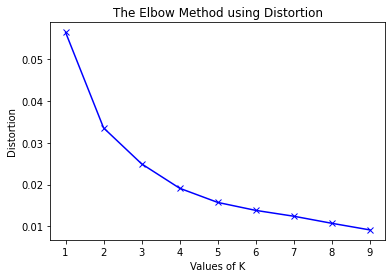

In [47]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

## Testing 

In [ ]:
df.isnull().any().any()

False

In [ ]:
df.isnull().any()

tweet               False
sentiment           False
language            False
tag                 False
Cleaned_Tweets      False
Tokenized_Tweets    False
Lemma               False
row_means           False
dtype: bool

In [ ]:
test_k = Mod_Kmeans(6, 500, 1500)
means = df.row_means.values.reshape(-1,1) 
%time fitted = test_k.fit_kmeans(means)
predicted_values = test_k.predict(means)

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Running Model Iteration 600 
Running Model Iteration 700 
Running Model Iteration 800 
Running Model Iteration 900 
Running Model Iteration 1000 
Running Model Iteration 1100 
Running Model Iteration 1200 
Running Model Iteration 1300 
Running Model Iteration 1400 
Model finished running
CPU times: user 3.89 s, sys: 32.1 ms, total: 3.92 s
Wall time: 5.34 s


In [ ]:
cluster1 = df[test_k.cluster_labels==0]
cluster1.shape

(596, 8)

In [ ]:
cluster2 = df[test_k.cluster_labels==1]
cluster2.shape

(1378, 8)

In [ ]:
cluster3 = df[test_k.cluster_labels==2]
cluster3.shape

(3078, 8)

In [ ]:
cluster4 = df[test_k.cluster_labels==3]
cluster4.shape

(2069, 8)

In [ ]:
cluster5 = df[test_k.cluster_labels==4]
cluster5.shape

(2764, 8)

In [ ]:
cluster6 = df[test_k.cluster_labels==5]
cluster6.shape


(114, 8)

# **Cluster Labeling**

In [ ]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    words = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = v.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        words_in_cluster = pd.DataFrame(best_features, columns = ['features', 'score'])
        words.append(words_in_cluster)
    return words

def plotWords(words, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, 6):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = words[i][:n_feats])
        plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


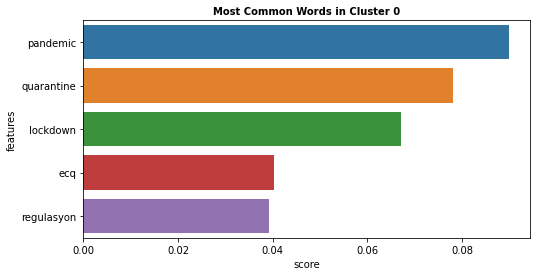

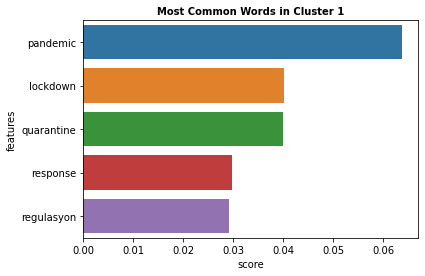

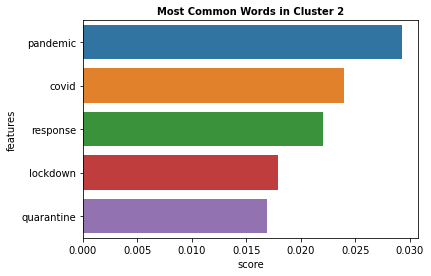

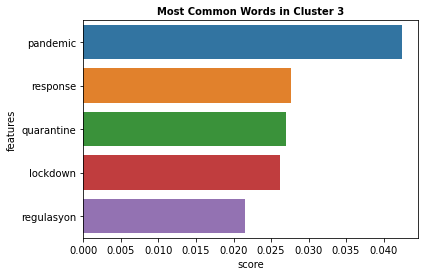

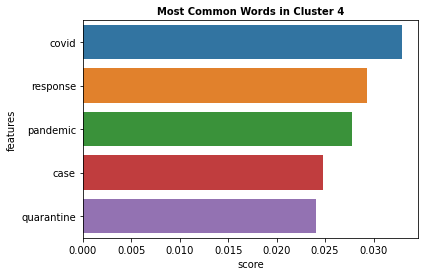

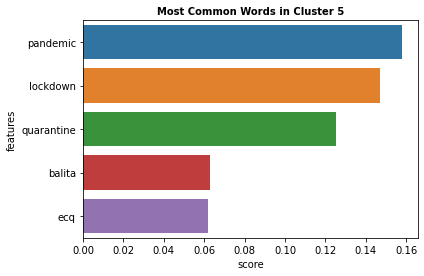

In [ ]:
#Getting the most common words per cluster

n_feats = 5
common = get_top_features_cluster(tf_idf_array, predicted_values, n_feats)
plotWords(common, 5)

### Extracting Common Words

In [ ]:
i=0
common_words_per_cluster=[]
for _ in (common):
  common_words = common[i]
  common_words = np.array(common_words['features'])
  common_words_per_cluster.append(common_words)
  i=i+1

In [ ]:
common_words_per_cluster

[array(['pandemic', 'quarantine', 'lockdown', 'ecq', 'regulasyon'],
       dtype=object),
 array(['pandemic', 'lockdown', 'quarantine', 'response', 'regulasyon'],
       dtype=object),
 array(['pandemic', 'covid', 'response', 'lockdown', 'quarantine'],
       dtype=object),
 array(['pandemic', 'response', 'quarantine', 'lockdown', 'regulasyon'],
       dtype=object),
 array(['covid', 'response', 'pandemic', 'case', 'quarantine'],
       dtype=object),
 array(['pandemic', 'lockdown', 'quarantine', 'balita', 'ecq'],
       dtype=object)]

## Getting the Overall Sentiment

Text(0, 0.5, 'Frequency')

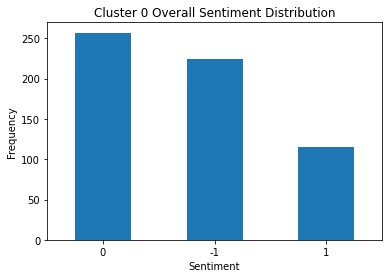

In [ ]:
c1 = cluster1['sentiment']
c1.value_counts().plot(kind='bar')
plt.title("Cluster 0 Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.xticks(rotation=0)
plt.ylabel("Frequency")

In [ ]:
c1 = cluster1['sentiment']
c1.value_counts()

 0    257
-1    224
 1    115
Name: sentiment, dtype: int64

Text(0, 0.5, 'Frequency')

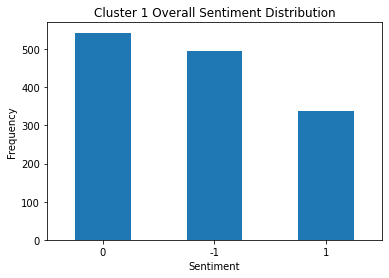

In [ ]:
c2 = cluster2['sentiment']
c2.value_counts().plot(kind='bar')
plt.title("Cluster 1 Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.xticks(rotation=0)
plt.ylabel("Frequency")

In [ ]:
c2 = cluster2['sentiment']
c2.value_counts()

 0    543
-1    496
 1    339
Name: sentiment, dtype: int64

Text(0, 0.5, 'Frequency')

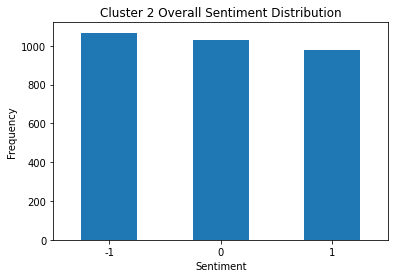

In [ ]:
c3 = cluster3['sentiment']
c3.value_counts().plot(kind='bar')
plt.title("Cluster 2 Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.xticks(rotation=0)
plt.ylabel("Frequency")

In [ ]:
c3 = cluster3['sentiment']
c3.value_counts()

-1    1067
 0    1031
 1     980
Name: sentiment, dtype: int64

Text(0, 0.5, 'Frequency')

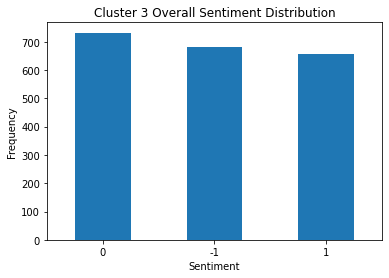

In [ ]:
c4 = cluster4['sentiment']
c4.value_counts().plot(kind='bar')
plt.title("Cluster 3 Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.xticks(rotation=0)
plt.ylabel("Frequency")

In [ ]:
c4 = cluster4['sentiment']
c4.value_counts()

 0    732
-1    681
 1    656
Name: sentiment, dtype: int64

Text(0, 0.5, 'Frequency')

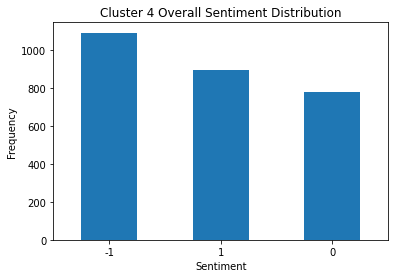

In [ ]:
c5 = cluster5['sentiment']
c5.value_counts().plot(kind='bar')
plt.title("Cluster 4 Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.xticks(rotation=0)
plt.ylabel("Frequency")

In [ ]:
c5 = cluster5['sentiment']
c5.value_counts()

-1    1090
 1     895
 0     779
Name: sentiment, dtype: int64

Text(0, 0.5, 'Frequency')

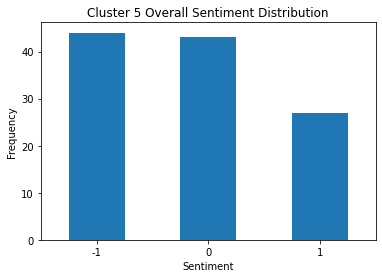

In [ ]:
c6 = cluster6['sentiment']
c6.value_counts().plot(kind='bar')
plt.title("Cluster 5 Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.xticks(rotation=0)
plt.ylabel("Frequency")

In [ ]:
c6 = cluster6['sentiment']
c6.value_counts()

-1    44
 0    43
 1    27
Name: sentiment, dtype: int64

##Sentiment Analysis

In [ ]:
clusterList = [cluster1, cluster2, cluster3, cluster4, cluster5, cluster6]

### Overall

In [ ]:
df.isnull().any()

tweet               False
sentiment           False
language            False
tag                 False
Cleaned_Tweets      False
Tokenized_Tweets    False
Lemma               False
row_means           False
dtype: bool

In [ ]:
missclass_sentiment_per_cluster_origKmeans=[]
for cluster in clusterList:
  x = cluster[["tweet","Lemma"]]
  y = cluster["sentiment"]
  x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.10)
  x_orig = x_test["tweet"]
  x_lemma = x_test["Lemma"]
  vec = TfidfVectorizer(stop_words=stpwrds)
  x_train = vec.fit_transform(x_train["Lemma"]).toarray()
  x_test = vec.transform(x_test["Lemma"]).toarray()
  model = MultinomialNB()
  model.fit(x_train, y_train)
  predicted = model.predict(x_test)
  y_test = list(y_test)
  cm = ConfusionMatrix(actual_vector=y_test, predict_vector=predicted, digit=5)
  missclass_sentiment = pd.DataFrame({'Original Tweet': x_orig, 'Lemma': x_lemma,'Actual': y_test, 'Predicted': predicted})
  missclass_sentiment_per_cluster_origKmeans.append(missclass_sentiment)
  print(confusion_matrix(y_test, predicted))
  print(classification_report(y_test, predicted, digits=4))

[[10 11  1]
 [ 3 22  0]
 [ 4  9  0]]
              precision    recall  f1-score   support

          -1     0.5882    0.4545    0.5128        22
           0     0.5238    0.8800    0.6567        25
           1     0.0000    0.0000    0.0000        13

    accuracy                         0.5333        60
   macro avg     0.3707    0.4448    0.3898        60
weighted avg     0.4339    0.5333    0.4617        60

[[27 17  6]
 [18 39  2]
 [11 11  7]]
              precision    recall  f1-score   support

          -1     0.4821    0.5400    0.5094        50
           0     0.5821    0.6610    0.6190        59
           1     0.4667    0.2414    0.3182        29

    accuracy                         0.5290       138
   macro avg     0.5103    0.4808    0.4822       138
weighted avg     0.5216    0.5290    0.5161       138

[[77 12 11]
 [27 62 18]
 [24 14 63]]
              precision    recall  f1-score   support

          -1     0.6016    0.7700    0.6754       100
           0     0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
x = df[["tweet","Lemma"]]
y = df["sentiment"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30)
x_orig = x_test["tweet"]
x_lemma = x_test["Lemma"]
vec = TfidfVectorizer(stop_words=stpwrds)
x_train = vec.fit_transform(x_train["Lemma"]).toarray()
x_test = vec.transform(x_test["Lemma"]).toarray()
model = MultinomialNB()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
y_test = list(y_test)
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=predicted, digit=5)
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted, digits=4))

#it's a functionally useless model, with the 0 in precision, recall, f1-score

[[790 160 107]
 [268 658 107]
 [157 176 577]]
              precision    recall  f1-score   support

          -1     0.6502    0.7474    0.6954      1057
           0     0.6620    0.6370    0.6492      1033
           1     0.7295    0.6341    0.6784       910

    accuracy                         0.6750      3000
   macro avg     0.6805    0.6728    0.6744      3000
weighted avg     0.6783    0.6750    0.6744      3000



In [ ]:
missclass_sentiment = pd.DataFrame({'tweet': x_orig, 'Cleaned_Tweet': x_lemma,'Actual': y_test, 'Predicted': predicted})
misclass = missclass_sentiment
misclass

,tweet,Cleaned_Tweet,Actual,Predicted
1562,Whoa! No psychotherapy class today but psychot...,whoa psychotherapy class today psychotherapy s...,1,0
8581,Nakaasa pa rin ang kaligtasan ng mamamayan sa ...,nakaasa kaligtasan mamamayan sariling pagiinga...,-1,-1
4121,@marqdmartian Mahirap maging active in this pa...,mahirap active pandemic Quarantine,-1,-1
8624,Nanood o nagbabasa man lang ba kayo ng mga bal...,nanood nagbabasa man ba kayo balita ibatibang ...,-1,-1
2956,Iyong totoo DTI Wala na po bang laman Ang utak...,totoo dti wala bang laman utak nyo pati nanahi...,0,0
...,...,...,...,...
7193,Over P5.1 million worth of financial and livel...,million worth financial livelihood assistance ...,1,1
3346,#NADINExBoyAbunda what i like abt the intervie...,nadinexboyabunda like abt interview talk shes ...,0,0
1115,totoo. kahit no abs na aq at dami ko na rin da...,totoo ab aq dami damit nag kasya eh keri lng m...,-1,-1
2918,grabe we are STILL in the middle of the pandem...,grabe still middle pandemic arguing adobo Lock...,0,0


In [ ]:
misclass.to_csv('/content/gdrive/Shareddrives/Thesis Group 2/Thesis II/test/FINAL algorithm/classification_sample.csv')

### Per Cluster

In [ ]:
missclass_sentiment_per_cluster=[]
overall_sentiment_per_cluster=[]
for cluster in clusterList:
  x = cluster[["tweet","Lemma"]]
  y = cluster["sentiment"]
  x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30)
  x_orig = x_test["tweet"]
  x_lemma = x_test["Lemma"]
  vec = TfidfVectorizer(stop_words=stpwrds)
  x_train = vec.fit_transform(x_train["Lemma"]).toarray()
  x_test = vec.transform(x_test["Lemma"]).toarray()
  model = MultinomialNB()
  model.fit(x_train, y_train)
  predicted = model.predict(x_test)
  y_test = list(y_test)
  cm = ConfusionMatrix(actual_vector=y_test, predict_vector=predicted, digit=5)
  missclass_sentiment = pd.DataFrame({'tweet': x_orig, 'Lemma': x_lemma,'Actual': y_test, 'Predicted': predicted})
  missclass_sentiment_per_cluster.append(missclass_sentiment)
  print(confusion_matrix(y_test, predicted))
  print(classification_report(y_test, predicted, digits=4))

[[37 29  0]
 [11 68  0]
 [12 18  4]]
              precision    recall  f1-score   support

          -1     0.6167    0.5606    0.5873        66
           0     0.5913    0.8608    0.7010        79
           1     1.0000    0.1176    0.2105        34

    accuracy                         0.6089       179
   macro avg     0.7360    0.5130    0.4996       179
weighted avg     0.6783    0.6089    0.5659       179

[[ 82  65   9]
 [ 35 126   1]
 [ 21  38  37]]
              precision    recall  f1-score   support

          -1     0.5942    0.5256    0.5578       156
           0     0.5502    0.7778    0.6445       162
           1     0.7872    0.3854    0.5175        96

    accuracy                         0.5918       414
   macro avg     0.6439    0.5629    0.5733       414
weighted avg     0.6218    0.5918    0.5824       414

[[204  73  57]
 [ 46 202  39]
 [ 41  60 202]]
              precision    recall  f1-score   support

          -1     0.7010    0.6108    0.6528       334


# **Final Output**

In [ ]:
#Function to translatte sentiment value into words
def value_to_word(num):
    sen = ""
    if(num == -1):
      sen = "Negative Sentiment"
    elif(num == 0):
      sen = "Neutral Sentiment"
    elif(num == 1):
      sen = "Postitive Sentiment"
    return sen

In [ ]:
i = 0
output = []
for i in range(0,6):
  out = []
  cluster_name = "Cluster #" + str(i+1)
  cluster = missclass_sentiment_per_cluster[i]
  word = ', '.join(map(str, common_words_per_cluster[i]))
  aa = clusterList[i]
  overall_sentiment = cluster['Predicted'].value_counts().idxmax()
  count = aa.shape[0]
  out.append(cluster_name)
  out.append(word)
  out.append(count)
  out.append(value_to_word(overall_sentiment))
  output.append(out)
  i = i+1
output = pd.DataFrame(output, columns=['','Common Words', 'Tweet Count','Overall Sentiment'])
pd.set_option('display.max_colwidth', 0)
output.set_index('', drop=True)

,Common Words,Tweet Count,Overall Sentiment
,,,
Cluster #1,"pandemic, quarantine, lockdown, ecq, regulasyon",596,Neutral Sentiment
Cluster #2,"pandemic, lockdown, quarantine, response, regulasyon",1378,Neutral Sentiment
Cluster #3,"pandemic, covid, response, lockdown, quarantine",3078,Neutral Sentiment
Cluster #4,"pandemic, response, quarantine, lockdown, regulasyon",2069,Negative Sentiment
Cluster #5,"covid, response, pandemic, case, quarantine",2764,Negative Sentiment
Cluster #6,"pandemic, lockdown, quarantine, balita, ecq",114,Neutral Sentiment


Testing of Sentiment

In [ ]:
test = ['total covid cases']
vec_test = vec.transform(test)
predicted_test = model.predict(vec_test)
predicted_test
test.append(value_to_word(predicted_test[0]))
predicted_out = pd.DataFrame(test)
predicted_out.index = ['Text', 'Predicted Sentiment']
predicted_out = predicted_out.T
pd.set_option('display.max_colwidth', 0)
predicted_out

,Text,Predicted Sentiment
0,total covid cases,Neutral Sentiment


# **K-Fold Cross-Validation**

In [ ]:
import itertools
from sklearn.metrics import classification_report,confusion_matrix
def plot_confusion_matrix(K, cm, classes,
                          num_classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    print()

For K=1

              precision    recall  f1-score   support

          -1     0.6642    0.7320    0.6965       724
           0     0.6727    0.6540    0.6632       682
           1     0.7384    0.6700    0.7026       594

    accuracy                         0.6870      2000
   macro avg     0.6918    0.6853    0.6874      2000
weighted avg     0.6891    0.6870    0.6869      2000

For K=2

              precision    recall  f1-score   support

          -1     0.6970    0.7595    0.7269       736
           0     0.6687    0.6739    0.6713       644
           1     0.7250    0.6419    0.6809       620

    accuracy                         0.6955      2000
   macro avg     0.6969    0.6918    0.6930      2000
weighted avg     0.6966    0.6955    0.6948      2000

For K=3

              precision    recall  f1-score   support

          -1     0.6596    0.7468    0.7005       711
           0     0.6903    0.6629    0.6763       706
           1     0.7485    0.6638    0.7036     

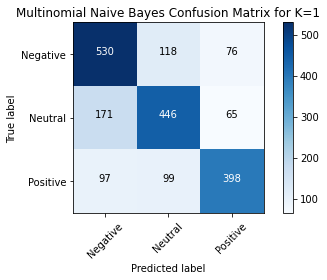

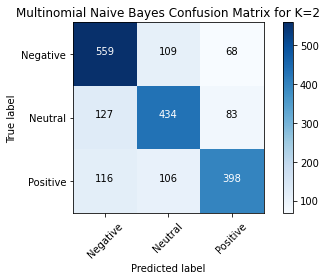

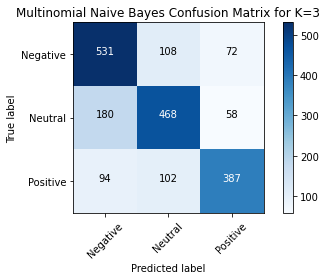

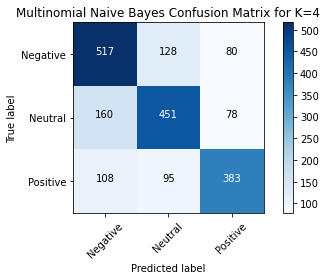

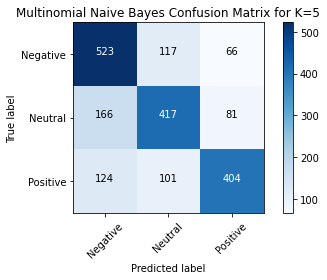

In [ ]:
from sklearn.model_selection import KFold
# x = df[["tweet","Lemma"]]
# y = df["sentiment"]
data = df[["tweet","Lemma", "sentiment"]]

K = 5
kfold =  KFold(n_splits=K, shuffle=True)

ctr = 1
# enumerate splits
for train, test in kfold.split(data):
  print("For K={0}".format(ctr))
	# print('train: %s, test: %s' % (data[train], data[test]))
  X_train = data[["tweet","Lemma"]].loc[train]
  X_test = data[["tweet","Lemma"]].loc[test]
  y_train = data[["sentiment"]].loc[train]
  y_test = data[["sentiment"]].loc[test]
  x_orig = X_test["tweet"]
  x_lemma = X_test["Lemma"]
  vec = TfidfVectorizer(stop_words=stpwrds)
  X_train_transformed = vec.fit_transform(X_train["Lemma"]).toarray()
  X_test_transformed = vec.transform(X_test["Lemma"]).toarray()
  model = MultinomialNB()
  model.fit(X_train_transformed, y_train.values.ravel())
  predicted = model.predict(X_test_transformed)
  cm = confusion_matrix(y_test, predicted)

  # Plot confusion matrix
  plt.figure()
  plot_confusion_matrix(ctr, cm, classes=['Negative', 'Neutral', 'Positive'], num_classes=3, title='Multinomial Naive Bayes Confusion Matrix for K={0}'.format(ctr))
  print(classification_report(y_test, predicted, digits=4))
  ctr += 1


In [ ]:
kf = KFold(n_splits=5, shuffle=False)
accuracy_model = []
for train_index, test_index in kf.split(df.tweet):
    # Split train-test
    X1_train, X1_test = df.tweet.iloc[train_index], df.tweet.iloc[test_index]
    X2_train, X2_test = df.Lemma.iloc[train_index], df.Lemma.iloc[test_index]
    y_train, y_test = df.sentiment.iloc[train_index], df.sentiment.iloc[test_index]

#**Statistical Treatment**

In [ ]:
##SILHOUETTE COEFFICIENT
#ADVANTAGES
#The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

#DISADVANTAGES
#The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.
#The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.


metrics.silhouette_score(means, predicted_values)

0.5534979525826754

In [ ]:
##Calinski-Harabasz Index
#ADVANTAGES
#The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
#The score is fast to compute.

#DISADVANTAGES
#The Calinski-Harabasz index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

metrics.calinski_harabasz_score(means, predicted_values)

33914.018886836704

In [ ]:
###Davies-Bouldin Index
#ADVANTAGES
#The computation of Davies-Bouldin is simpler than that of Silhouette scores.
#The index is computed only quantities and features inherent to the dataset..

#DISADVANTAGES
#The Davies-Boulding index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained from DBSCAN.
#The usage of centroid distance limits the distance metric to Euclidean space.


from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(means, predicted_values)

0.531496961201629

In [ ]:
from scipy import stats

BiLDA_SC = [0.5534, 0.5535, 0.5536]
BiLDA_CHI = [33914.0189, 33914.0188, 33914.0187]
BiLDA_BDI = [0.5315, 0.5314, 0.5316]

M_Kmean_SC = [0.5519, 0.5519, 0.5519]
M_Kmean_CHI = [25693.96, 25693.96, 25693.96]
M_Kmean_BDI = [0.5490, 0.5490, 0.5490]

In [ ]:
stats.ttest_rel(BiLDA_SC, M_Kmean_SC)

Ttest_relResult(statistic=27.712812921105883, pvalue=0.001299545708224822)

In [ ]:
stats.ttest_rel(M_Kmean_CHI, BiLDA_CHI)

Ttest_relResult(statistic=-142375593.24515265, pvalue=4.933202087658198e-17)

In [ ]:
stats.ttest_rel(BiLDA_BDI, M_Kmean_BDI)

Ttest_relResult(statistic=-303.10889132458817, pvalue=1.0884176040983146e-05)

In [ ]:
BiLDA_C1 = [68.34, 66.15, 67.75]
BiLDA_C2 = [69.53, 70.20, 68.47]
BiLDA_C3 = [69.38, 70.11, 68.38]
BiLDA_C4 = [66.1, 66.26, 68.78]
BiLDA_C5 = [68.52, 67.82, 70.24]
BiLDA_C6 = [67.33, 69.98, 68.48]


M_Kmean_C1 = [59.78, 60.33, 60.02]
M_Kmean_C2 = [60.73, 60.29, 59.50]
M_Kmean_C3 = [58.49, 59.04, 61.57]
M_Kmean_C4 = [61.33, 61.66, 61.73]
M_Kmean_C5 = [58.86, 59.74, 59.44]
M_Kmean_C6 = [61.40, 60.19, 58.25]

In [ ]:
stats.ttest_rel(M_Kmean_C1, BiLDA_C1)

Ttest_relResult(statistic=-9.085389296433465, pvalue=0.011898910737776979)

In [ ]:
stats.ttest_rel(M_Kmean_C2, BiLDA_C2)

Ttest_relResult(statistic=-26.730552340437697, pvalue=0.0013966049780967567)

In [ ]:
stats.ttest_rel(M_Kmean_C3, BiLDA_C3)

Ttest_relResult(statistic=-6.894464945778405, pvalue=0.02039630207633424)

In [ ]:
stats.ttest_rel(M_Kmean_C4, BiLDA_C4)

Ttest_relResult(statistic=-6.929503840337968, pvalue=0.020196747513588634)

In [ ]:
stats.ttest_rel(M_Kmean_C5, BiLDA_C5)

Ttest_relResult(statistic=-12.063367433908882, pvalue=0.006801650979124829)

In [ ]:
stats.ttest_rel(M_Kmean_C6, BiLDA_C6)

Ttest_relResult(statistic=-6.332735104977309, pvalue=0.024039934673613626)